# Project 3 : Web APIs & Classification (continued)

## Importing Libraries

In [25]:
import requests
import time
import pandas as pd
import numpy as np
import csv
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction import stop_words
import seaborn as sns
import matplotlib.pyplot as plt


## Read DataFrame 

In [4]:
df = pd.read_csv('df_politics_sports.csv')

In [8]:
df.head(1)

,all_awardings,allow_live_comments,approved_at_utc,approved_by,archived,author,author_cakeday,author_flair_background_color,author_flair_css_class,author_flair_richtext,...,thumbnail_width,title,total_awards_received,ups,url,user_reports,view_count,visited,whitelist_status,wls
0,[],True,NaN,NaN,False,NALEOEducationalFund,NaN,NaN,verified,"[{'e': 'text', 't': 'NALEO'}]",...,NaN,We are leaders at NALEO Educational Fund. We’r...,0,609,https://www.reddit.com/r/politics/comments/di9...,[],NaN,False,all_ads,6


In [10]:
df['combined']=df.apply(lambda x:'%s_%s' % (x['title'],x['selftext']),axis=1)

In [12]:
df[['label', 'title', 'selftext', 'combined']].head(1)

,label,title,selftext,combined
0,0,We are leaders at NALEO Educational Fund. We’r...,"Hi Reddit! We are Arturo Vargas, CEO and Lizet...",We are leaders at NALEO Educational Fund. We’r...


In [20]:
df1 = df[['label', 'title', 'selftext', 'combined']]

## Model prep

In [13]:
X = df['combined']
y = df['label']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    stratify=y,
                                                    random_state=42)

In [52]:
df.shape

(1961, 111)

In [55]:
cvec = CountVectorizer()

In [56]:
cvec.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [57]:
X_train = cvec.transform(X_train)

In [58]:
X_train.shape

(1313, 4256)

In [59]:
X_train_df = pd.DataFrame(X_train.toarray(),
                          columns=cvec.get_feature_names())
X_train_df

,000,000m,00_nan,04,041lbs,04_nan,0_nan,10,1000,1000_nan,...,yu,yun,zdenrk,zealand,zealands,zhiyong,zone_nan,zuckerberg,zuckerberg_nan,zuerlein
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1308,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1309,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1310,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1311,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
X_test = cvec.transform(X_test)
X_test_df = pd.DataFrame(X_test.toarray(),
                         columns=cvec.get_feature_names())

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    stratify=y,
                                                    random_state=42)

In [62]:
y_test.value_counts(normalize=True)

0    0.501543
1    0.498457
Name: label, dtype: float64

In [63]:
pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('lr', LogisticRegression())
])

In [64]:
pipe_params = {
    'cvec__max_features': [2500, 3000, 3500],
    'cvec__min_df': [1, 2],
    'cvec__max_df': [.9, .95],
    'cvec__ngram_range': [(1,1), (1,2)]
}

In [65]:
gs = GridSearchCV(pipe, # what object are we optimizing?
                  param_grid=pipe_params, # what parameters values are we searching?
                  cv=3) # 3-fold cross-validation.

In [66]:
gs.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('cvec', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'cvec__max_features': [2500, 3000, 3500], 'cvec__min_df': [1, 2], 'cvec__max_df': [0.9, 0.95], 'cvec__ngram_range': [(1, 1), (1, 2)]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [67]:
print(gs.best_score_)

0.9657273419649657


In [68]:
gs_model = gs.best_estimator_

In [69]:
gs_model.score(X_train, y_train)

1.0

In [70]:
gs_model.score(X_test, y_test)

0.9737654320987654

In [71]:
tvec = TfidfVectorizer()

In [72]:
df = pd.DataFrame(tvec.fit_transform(X_train).toarray(),
                  columns=tvec.get_feature_names())
df.head()

,000,000m,00_nan,04,041lbs,04_nan,0_nan,10,1000,1000_nan,...,yu,yun,zdenrk,zealand,zealands,zhiyong,zone_nan,zuckerberg,zuckerberg_nan,zuerlein
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.401602,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [73]:
X_train = tvec.fit_transform(X_train)

X_test = tvec.transform(X_test)

In [74]:

lr = LogisticRegression()


lr.fit(X_train, y_train)


print(f'Training Score: {lr.score(X_train, y_train)}')
print(f'Testing Score: {lr.score(X_test, y_test)}')

Training Score: 0.9984767707539984
Testing Score: 0.9768518518518519


In [75]:

print(f'Logistic Regression Coefficient: {lr.coef_}')

Logistic Regression Coefficient: [[-0.29360643  0.1763004   0.13752452 ... -0.39460413 -0.10103456
   0.1272139 ]]


In [76]:
np.exp(lr.coef_)

array([[0.74556987, 1.19279632, 1.14742984, ..., 0.67394678, 0.9039018 ,
        1.13565991]])

In [77]:


from sklearn.metrics import confusion_matrix

In [78]:
preds = lr.predict(X_test)

In [79]:
confusion_matrix(y_test,
                 preds) 

array([[313,  12],
       [  3, 320]])

In [80]:
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

In [81]:

spec = tn / (tn + fp)

print(f'Specificity: {round(spec,4)}')

Specificity: 0.9631


In [83]:


sens = tp / (tp + fn)

print(f'Sensitivity: {round(sens,4)}')

Sensitivity: 0.9907


In [84]:
pred_proba = [i[1] for i in lr.predict_proba(X_test)]

pred_df = pd.DataFrame({'true_values': y_test,
                        'pred_probs':pred_proba})

## Data Visualization 

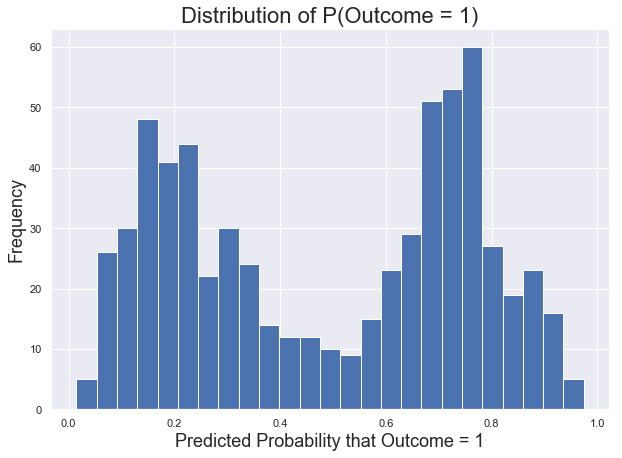

In [85]:

plt.figure(figsize = (10,7))


plt.hist(pred_df['pred_probs'], bins=25)


plt.title('Distribution of P(Outcome = 1)', fontsize=22)
plt.ylabel('Frequency', fontsize=18)
plt.xlabel('Predicted Probability that Outcome = 1', fontsize=18);

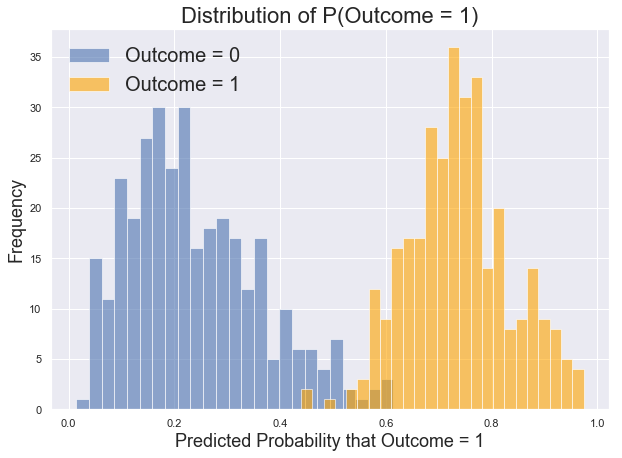

In [86]:

plt.figure(figsize = (10,7))


plt.hist(pred_df[pred_df['true_values'] == 0]['pred_probs'],
         bins=25,
         color='b',
         alpha = 0.6,
         label='Outcome = 0')
plt.hist(pred_df[pred_df['true_values'] == 1]['pred_probs'],
         bins=25,
         color='orange',
         alpha = 0.6,
         label='Outcome = 1')


plt.title('Distribution of P(Outcome = 1)', fontsize=22)
plt.ylabel('Frequency', fontsize=18)
plt.xlabel('Predicted Probability that Outcome = 1', fontsize=18)


plt.legend(fontsize=20);

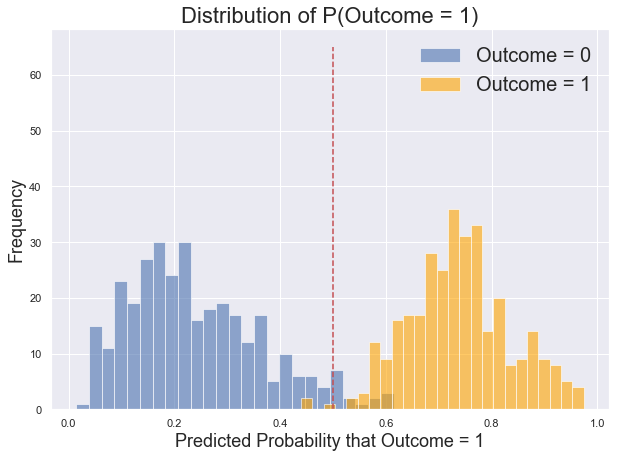

In [87]:

plt.figure(figsize = (10,7))


plt.hist(pred_df[pred_df['true_values'] == 0]['pred_probs'],
         bins=25,
         color='b',
         alpha = 0.6,
         label='Outcome = 0')
plt.hist(pred_df[pred_df['true_values'] == 1]['pred_probs'],
         bins=25,
         color='orange',
         alpha = 0.6,
         label='Outcome = 1')


plt.vlines(x=0.5,
           ymin = 0,
           ymax = 65,
           color='r',
           linestyle = '--')


plt.title('Distribution of P(Outcome = 1)', fontsize=22)
plt.ylabel('Frequency', fontsize=18)
plt.xlabel('Predicted Probability that Outcome = 1', fontsize=18)


plt.legend(fontsize=20);

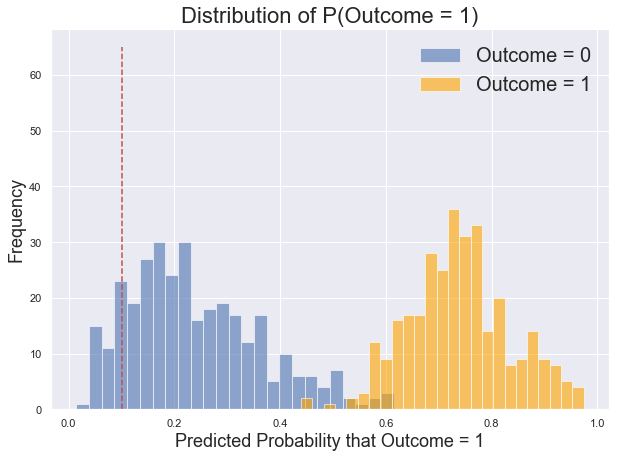

In [88]:

plt.figure(figsize = (10,7))


plt.hist(pred_df[pred_df['true_values'] == 0]['pred_probs'],
         bins=25,
         color='b',
         alpha = 0.6,
         label='Outcome = 0')
plt.hist(pred_df[pred_df['true_values'] == 1]['pred_probs'],
         bins=25,
         color='orange',
         alpha = 0.6,
         label='Outcome = 1')


plt.vlines(x=0.1,
           ymin = 0,
           ymax = 65,
           color='r',
           linestyle = '--')


plt.title('Distribution of P(Outcome = 1)', fontsize=22)
plt.ylabel('Frequency', fontsize=18)
plt.xlabel('Predicted Probability that Outcome = 1', fontsize=18)


plt.legend(fontsize=20);

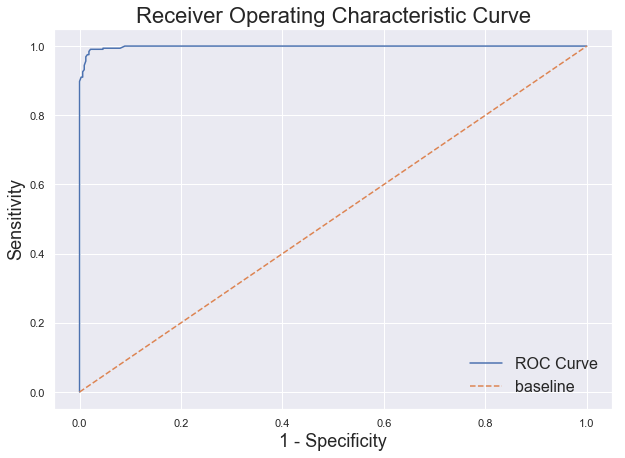

In [89]:

plt.figure(figsize = (10,7))


thresholds = np.linspace(0, 1, 200)


def TPR(df, true_col, pred_prob_col, threshold):
    true_positive = df[(df[true_col] == 1) & (df[pred_prob_col] >= threshold)].shape[0]
    false_negative = df[(df[true_col] == 1) & (df[pred_prob_col] < threshold)].shape[0]
    return true_positive / (true_positive + false_negative)
    


def FPR(df, true_col, pred_prob_col, threshold):
    true_negative = df[(df[true_col] == 0) & (df[pred_prob_col] <= threshold)].shape[0]
    false_positive = df[(df[true_col] == 0) & (df[pred_prob_col] > threshold)].shape[0]
    return 1 - (true_negative / (true_negative + false_positive))
    

tpr_values = [TPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]
fpr_values = [FPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]


plt.plot(fpr_values, 
         tpr_values, 
         label='ROC Curve')


plt.plot(np.linspace(0, 1, 200),
         np.linspace(0, 1, 200),
         label='baseline',
         linestyle='--')


plt.title('Receiver Operating Characteristic Curve', fontsize=22)
plt.ylabel('Sensitivity', fontsize=18)
plt.xlabel('1 - Specificity', fontsize=18)


plt.legend(fontsize=16);

In [90]:
from sklearn.metrics import roc_auc_score

In [91]:
roc_auc_score(pred_df['true_values'], pred_df['pred_probs'])

0.998428197189807

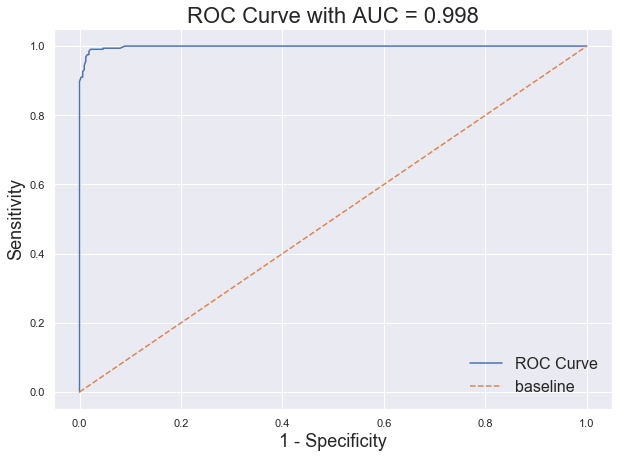

In [92]:

plt.figure(figsize = (10,7))


thresholds = np.linspace(0, 1, 200)


def TPR(df, true_col, pred_prob_col, threshold):
    true_positive = df[(df[true_col] == 1) & (df[pred_prob_col] >= threshold)].shape[0]
    false_negative = df[(df[true_col] == 1) & (df[pred_prob_col] < threshold)].shape[0]
    return true_positive / (true_positive + false_negative)
    


def FPR(df, true_col, pred_prob_col, threshold):
    true_negative = df[(df[true_col] == 0) & (df[pred_prob_col] <= threshold)].shape[0]
    false_positive = df[(df[true_col] == 0) & (df[pred_prob_col] > threshold)].shape[0]
    return 1 - (true_negative / (true_negative + false_positive))
    

tpr_values = [TPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]
fpr_values = [FPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]


plt.plot(fpr_values, # False Positive Rate on X-axis
         tpr_values, # True Positive Rate on Y-axis
         label='ROC Curve')


plt.plot(np.linspace(0, 1, 200),
         np.linspace(0, 1, 200),
         label='baseline',
         linestyle='--')


plt.title(f'ROC Curve with AUC = {round(roc_auc_score(pred_df["true_values"], pred_df["pred_probs"]),3)}', fontsize=22)
plt.ylabel('Sensitivity', fontsize=18)
plt.xlabel('1 - Specificity', fontsize=18)


plt.legend(fontsize=16);
